### Firstly, import libraries needed to process and visualize the data.

In [1695]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## **Load the Data**

### load paths of both train and test data using Pandas library.

In [1696]:
titanic_train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

### Explore and view summary statistics of the data by showing a description to learn more about the data.

In [1697]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1698]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### View all columns included to select some of them to work on.

In [1699]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Show information about each column, to determine if there are missing values in any column so we can deal with it.

In [1700]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1701]:
titanic_train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### View total number of missing values in each column.

In [1702]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As shown in previous step, i found that embarked column have only two missing values, so i decided to fill it with the most frequent value.

In [1703]:
titanic_train_data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### I found that **'S'** is the most frequent value so i fill the two NA values with it.

In [1704]:
titanic_train_data.Embarked.fillna('S',inplace=True)

### Check if it's successfully filled.

In [1705]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Now check test data.

In [1706]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### As observed above, for both train and test data there are missing values for column **'Age'**, let's see how the its distribution looks like.

<AxesSubplot:xlabel='Age', ylabel='Count'>

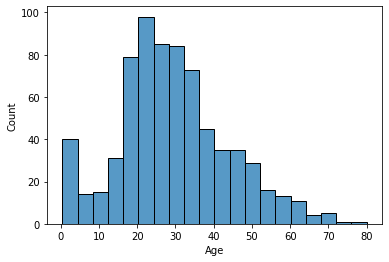

In [1707]:
sns.histplot(titanic_train_data.Age)

### Thus i decided to replace all missing values by the **median** of column **'Age**'.

In [1708]:
median = titanic_train_data.Age.median()
titanic_train_data.Age.fillna(median,inplace=True)
titanic_test_data.Age.fillna(median,inplace=True)

In [1709]:
titanic_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Check if it's filled successfully.

In [1710]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Now we don't have any missing values except in column **'Cabin'**, it's observed that it has many missing values, more than half of total values are missing, so i decided to remove this column and it will not affect the model as there are more important columns than can be presented as features.

In [1711]:
del titanic_train_data['Cabin']
del titanic_test_data['Cabin']

### Check again if there are any missing values.

In [1712]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1713]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [1714]:
titanic_test_data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

### Fill missing value in column **'Fare'** in test data with the **mean** of the column.

In [1715]:
mean = titanic_train_data.Fare.mean()
titanic_test_data.Fare.fillna(mean,inplace=True)
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### Replace the **Sex** and **Embarked** columns to be numeric to be able to fit the data. Sex column has two categories Female and Male, Embarked column has three categories S, C and Q.

In [1716]:
replace = {'female':0,'male':1}
titanic_train_data.Sex = titanic_train_data.Sex.map(replace)
titanic_test_data.Sex = titanic_test_data.Sex.map(replace)
replace2 = {'S':0,'C':1,'Q':2}
titanic_train_data.Embarked = titanic_train_data.Embarked.map(replace2)
titanic_test_data.Embarked = titanic_test_data.Embarked.map(replace2)
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [1717]:
titanic_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### After preprocessing, now we need to select data for **training and modeling**, obviously the target is 'Survived', and some features will be selected, then we will split the data for **model evaluation**.

In [1718]:
y = titanic_train_data['Survived']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_train_data[features]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state = 0)

### Building models by defining, fitting, and predicting the test data. Then evaluation done for each model by splitting train data **80%-20%** where part of this data used to test the train data accuracy. Also i will use **cross validation** for more accurate measurment and to make sure what is the best model for this problem

## **Decision Tree Classifier**

In [1719]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(train_X, train_y)
dt_prediction = dt.predict(test_X)
accuracy = accuracy_score(test_y,dt_prediction)
print(accuracy)

0.776536312849162


In [1720]:
scores = cross_val_score(dt, X, y, cv=10)
print(scores)
accuracy = scores.mean()
print("\n accuracy: ",accuracy)

[0.72222222 0.78651685 0.74157303 0.7752809  0.83146067 0.76404494
 0.79775281 0.79775281 0.83146067 0.82022472]

 accuracy:  0.7868289637952559


## **Logistic Regression**

In [1721]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_X, train_y)
lr_prediction = lr.predict(test_X)
accuracy = accuracy_score(test_y,lr_prediction)
print(accuracy)

0.8212290502793296


In [1722]:
scores = cross_val_score(lr, X, y, cv=10)
print(scores)
accuracy = scores.mean()
print("\n accuracy: ",accuracy)

[0.78888889 0.79775281 0.74157303 0.84269663 0.79775281 0.76404494
 0.78651685 0.78651685 0.82022472 0.83146067]

 accuracy:  0.7957428214731584


## **Support Vector Classifier**

In [1723]:
svc = SVC()
svc.fit(train_X, train_y)
svc_prediction = svc.predict(test_X)
accuracy = accuracy_score(test_y,svc_prediction)
print(accuracy)

0.7206703910614525


In [1724]:
scores = cross_val_score(svc, X, y, cv=10)
print(scores)
accuracy = scores.mean()
print("\n accuracy: ",accuracy)

[0.62222222 0.57303371 0.68539326 0.74157303 0.68539326 0.68539326
 0.68539326 0.71910112 0.70786517 0.6741573 ]

 accuracy:  0.6779525593008738


### Thus **Logistic Regression** gives the most accurate results in this case.

In [1725]:
test = titanic_test_data[features]
prediction = lr.predict(test)

In [1726]:
submission = pd.DataFrame({"PassengerId":titanic_test_data.PassengerId, 'Survived':prediction.astype(int).ravel()})
submission.to_csv("final_submission_lr.csv",index = False)
print("Submission was successfully saved!")

Submission was successfully saved!
